In [1]:
import os
import pandas as pd
import numpy as np

import wrangle as wr
import explore as ex

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wr.get_zillow()
df = wr.prep_zillow(df)
df = wr.impute_missing_values(df)
df = wr.handle_missing_values(df,.75,.75)

# Planning



## 3. How does proportion of sqft to lotsize affect logerror?
## 4. How does the year a home was built affect the logerror?

# DATA WRANGLE/SPLIT

In [3]:
train, validate, test = wr.wrangle_zillow()
train.shape, validate.shape, test.shape

((12630, 24), (5414, 24), (4512, 24))

In [4]:
train.head()

,bathrooms,bedrooms,buildingqualitytypeid,calculatedbathnbr,sqft,county,fullbathcnt,latitude,longitude,lotsize,...,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,logerror,transactiondate,heatingorsystemdesc
51134,3.0,4.0,8.0,3.0,3054.0,los_angeles,3.0,34612160.0,-118192061.0,7559.0,...,258899.0,323555.0,2016.0,64656.0,4822.25,Y,6.037910e+13,0.024982,2017-09-12,Central
34308,3.0,3.0,6.0,3.0,1840.0,los_angeles,3.0,33801677.0,-118354140.0,4939.0,...,213753.0,630369.0,2016.0,416616.0,7233.51,Y,6.037651e+13,0.123077,2017-06-27,Central
25453,2.0,3.0,6.0,2.0,1582.0,los_angeles,2.0,34151780.0,-118394127.0,10128.0,...,103210.0,604974.0,2016.0,501764.0,7310.75,Y,6.037143e+13,-0.055948,2017-05-19,Floor/Wall
24422,2.0,3.0,6.0,2.0,1291.0,los_angeles,2.0,34081724.0,-117931703.0,7208.0,...,136283.0,212795.0,2016.0,76512.0,2831.39,Y,6.037406e+13,0.005930,2017-05-16,Central
1232,1.0,2.0,4.0,1.0,1132.0,los_angeles,1.0,34110207.0,-118052858.0,9751.0,...,38327.0,64192.0,2016.0,25865.0,1132.09,Y,6.037432e+13,0.084840,2017-01-10,Floor/Wall


In [5]:
numerical_columns = ['sqft', 'latitude', 'longitude', 'lotsize', 'yearbuilt','structuretaxvaluedollarcnt', 'tax_value', 'assessmentyear','landtaxvaluedollarcnt', 'taxamount', 'censustractandblock','logerror']

train_scaled, validate_scaled, test_scaled = wr.scale_data(train, validate, test, numerical_columns)

# EXPLORE DATA

## 1. What is the realtionship between bedrooms, bathrooms and logerror?

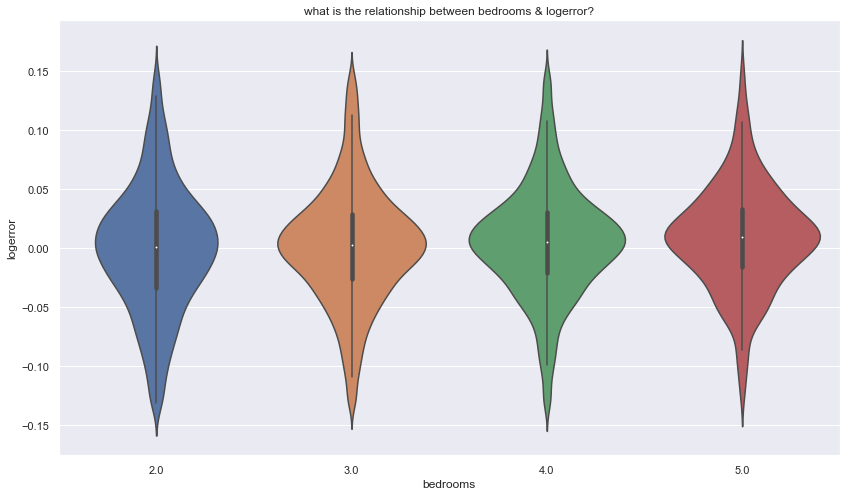

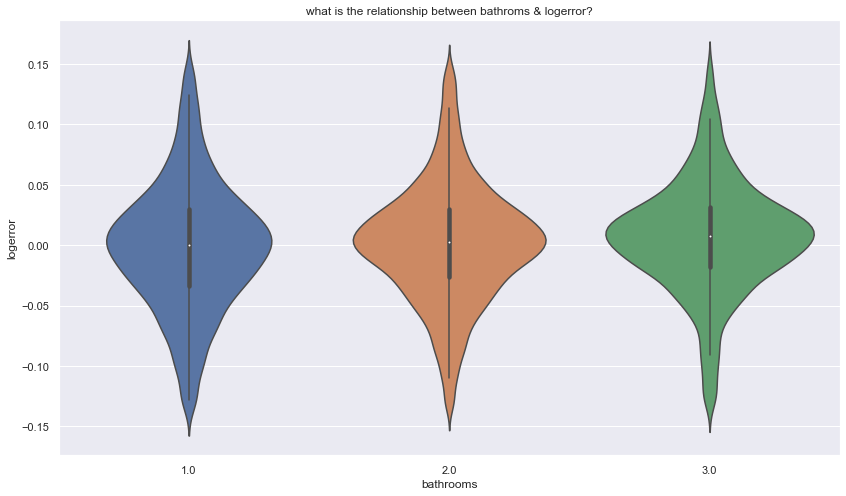

In [6]:
ex.bb_log_graph(train)

In [7]:
def bb_test(df):
    ''' 
    Runs statitical testing for bed and bathroom comparison.
    '''
    baths_above_md = df[(df.bathrooms > df.bathrooms.median())&(df.bedrooms < df.bedrooms.median())].logerror
    baths_below_md = df[(df.bathrooms < df.bathrooms.median())&(df.bedrooms > df.bedrooms.median())].logerror

    # Set alpha
    alpha = 0.05

    # Check for equal variances
    s, pval = stats.levene(baths_above_md, baths_below_md)

    # Use the results from checking for equal variances to set equal_var
    t, p = stats.ttest_ind(baths_above_md, baths_below_md, equal_var=(pval >= alpha))

    # Evaluate results based on the t-statistic and the p-value
    if p/2 < alpha and t > 0:
        print('''Reject the Null Hypothesis.
        
Homes with above the median amonut of bathrooms and below the median amount of bedrooms are more expensive then the opposite.''')
    else:
        print('''Fail to reject the Null Hypothesis.
        
Homes with above the median amount of bathrooms and below the median amount of bedrooms are cheaper then the opposite.''')

## 2. How does tax_value relate to log error?

<Figure size 864x576 with 0 Axes>

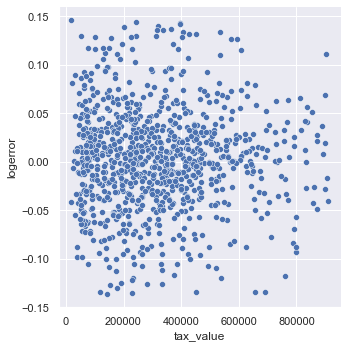

In [8]:
plt.figure(figsize=(12,8))
sns.relplot(x=train['tax_value'].sample(1000),y='logerror', data=train, kind='scatter')